In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [5]:
iris = load_iris()

In [62]:
# print(iris.DESCR)

In [34]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [36]:
# data.columns
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
# iris.feature_names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.columns = columns
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [83]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
data_ld = data[ ['sepal_length', 'sepal_width'] ]

In [29]:
data_ld.describe()

,sepal_length,sepal_width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [37]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
lda = LinearDiscriminantAnalysis()

In [39]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [40]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2])

In [41]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [42]:
result

,0,1
0,0,0
1,2,2
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


In [84]:
# расчет точности - отношение верный прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [45]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  4.90512922,  11.16297339, -15.71758778, -21.28112551],
       [ -1.24114607,  -3.75385971,   4.6462242 ,   2.89235557],
       [ -3.75855548,  -7.78696479,  11.49151312,  18.36290403]])

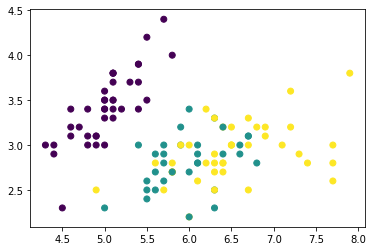

In [86]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [87]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['sepal_length', 'sepal_width']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

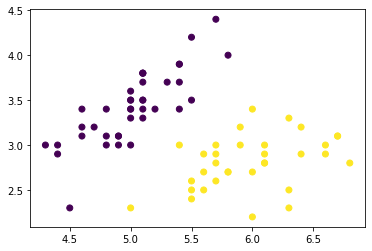

In [88]:
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [51]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [52]:
# посмотрим на центроиды
lda_small.means_

array([[5.01538462, 3.42051282],
       [5.98181818, 2.80909091]])

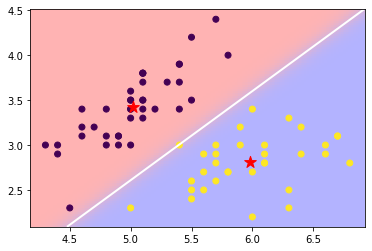

In [89]:
# строим scatter plot
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [56]:
# оба признака приблизительно равны по абсолютной величине
lda_small.coef_

array([[ 14.36654832, -14.48296109]])

In [90]:
# точность на тестовых данных
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [91]:
# K-means алгоритм
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [68]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X_train)

In [69]:
from sklearn.cluster import KMeans

In [75]:
# явно указываем количество кластеров
# kmeans = KMeans(n_clusters=2)
# # fit_predict обучается на данных и каждому объекту присваивает кластер
# clusters = kmeans.fit_predict(X_scaled)
# clusters

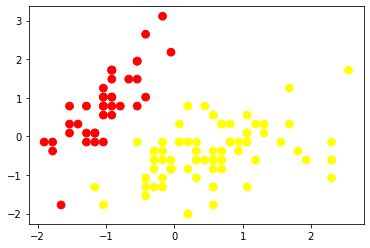

In [72]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [73]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

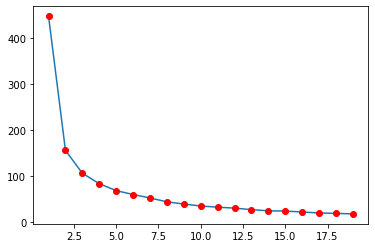

In [74]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [94]:
# выбираем количество кластеров, равное 3
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0,
       0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2,
       0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0,
       2, 1])

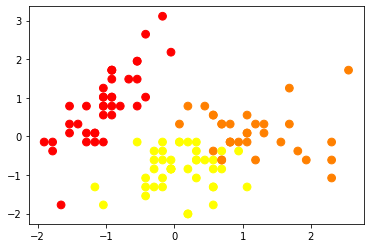

In [95]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)